# Proyek Analisis Data: **Bike Sharing Dataset**
- **Nama:** Raden Kenji Muhammad Farrel Satjadibrata
- **Email:** 	mc006d5y1260@student.devacademy.id
- **ID Dicoding:** MC006D5Y1260

## Menentukan Pertanyaan Bisnis

- Seberapa besar pengaruh cuaca terhadap jumlah sepeda yang disewa?
- Apakah pengguna **registered** lebih sering menyewa sepeda di hari kerja dibandingkan pengguna **casual**?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [81]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Jirrooo/Projek-Analisis-Data-Dicoding/refs/heads/main/Bike%20Sharing%20Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [82]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Jirrooo/Projek-Analisis-Data-Dicoding/refs/heads/main/Bike%20Sharing%20Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Dataset hour.csv dan day.csv memiliki atribut yang hampir sama, dengan perbedaan utama bahwa kolom hr (jam) hanya tersedia di hour.csv. Berikut adalah deskripsi masing-masing atribut yang terdapat dalam dataset ini:

*   **instant**: Indeks dari setiap record dalam dataset.
*   **dteday**: Tanggal pencatatan data.
*   **season**: Musim dalam setahun (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin).
*   **yr**: Tahun pencatatan data (0: Tahun 2011, 1: Tahun 2012).
*   **mnth**: Bulan pencatatan data (1 hingga 12).
*   **hr**: Jam dalam sehari (0 hingga 23), hanya tersedia di hour.csv.
holiday: Indikator apakah hari tersebut adalah hari libur (0: Bukan libur, 1: Libur).
*   **weekday**: Hari dalam seminggu (0: Minggu, 1: Senin, ..., 6: Sabtu).
*   **workingday**: Indikator apakah hari tersebut adalah hari kerja (1: Hari kerja, 0: Akhir pekan atau hari libur).
*   **weathersit**: Kategori kondisi cuaca saat itu:\
1: Cerah, sedikit berawan, atau sebagian berawan.\
2: Berkabut, mendung, atau berawan sebagian.\
3: Hujan ringan, salju ringan, atau badai petir ringan dengan awan tersebar.\
4: Hujan lebat, es, badai petir dengan kabut, atau salju tebal.\
*   **temp**: Suhu normalisasi dalam skala Celsius.
*   **atemp**: Suhu yang dirasakan dalam skala Celsius.
*   **hum**: Tingkat kelembaban udara yang telah dinormalisasi.
*   **windspeed**: Kecepatan angin yang telah dinormalisasi.
*   **casual**: Jumlah penyewa sepeda yang bukan anggota terdaftar.
*   **registered**: Jumlah penyewa sepeda yang merupakan anggota terdaftar.
*   **cnt**: Total jumlah penyewaan sepeda (penyewa casual + registered).

### Assessing Data

#### Menilai tabel 'day_df'

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Menilai tabel 'hour_df'

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**


*   Setelah diamati, kedua DataFrame tidak memiliki permasalahan apapun.



### Cleaning Data

#### Cleaning 'day_df'

In [60]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [61]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


#### Cleaning 'hour_df'

In [64]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [62]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak terdapat masalah apapun pada DataFrame day_df sehingga tidak perlu untuk melakukan pembersihan data
- Tidak terdapat masalah apapun pada DataFrame hour_df sehingga tidak perlu untuk melakukan pembersihan data

## Exploratory Data Analysis (EDA)

### Explore 'day_df'

In [21]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
90,91,2011-04-01,2,0,4,0,5,1,2,0.300000,0.283454,0.686250,0.258708,307,1920,2227
598,599,2012-08-21,3,1,8,0,2,1,1,0.649167,0.601025,0.673750,0.072771,1081,5925,7006
471,472,2012-04-16,2,1,4,1,1,0,1,0.664167,0.614925,0.561667,0.284829,1198,5172,6370
198,199,2011-07-18,3,0,7,0,1,1,1,0.746667,0.703925,0.651250,0.215804,841,3617,4458
376,377,2012-01-12,1,1,1,0,4,1,2,0.382500,0.381938,0.802917,0.180967,269,3828,4097
265,266,2011-09-23,4,0,9,0,5,1,2,0.609167,0.522125,0.972500,0.078367,258,2137,2395
389,390,2012-01-25,1,1,1,0,3,1,1,0.294167,0.294821,0.643750,0.161071,467,3803,4270
625,626,2012-09-17,3,1,9,0,1,1,2,0.580833,0.553050,0.734583,0.151742,1022,5847,6869
128,129,2011-05-09,2,0,5,0,1,1,1,0.532500,0.525246,0.588750,0.176000,664,3698,4362
258,259,2011-09-16,3,0,9,0,5,1,2,0.469167,0.461475,0.590417,0.164183,742,4018,4760


In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [18]:
day_df.corr(numeric_only=True)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


**Insight:**
- Pada dataframe day_df semuanya normal

### Explore 'hour_df'

In [22]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2701,2702,2011-04-27,2,0,4,11,0,3,1,2,0.64,0.5909,0.78,0.2836,53,103,156
10020,10021,2012-02-27,1,1,2,13,0,1,1,1,0.40,0.4091,0.43,0.2836,23,159,182
2399,2400,2011-04-14,2,0,4,21,0,4,1,1,0.46,0.4545,0.63,0.1343,19,126,145
2977,2978,2011-05-08,2,0,5,23,0,0,0,1,0.46,0.4545,0.88,0.0896,9,41,50
17065,17066,2012-12-18,4,1,12,20,0,2,1,1,0.36,0.3333,0.50,0.2537,4,264,268
9198,9199,2012-01-24,1,1,1,4,0,2,1,2,0.30,0.3182,1.00,0.0896,0,2,2
11415,11416,2012-04-25,2,1,4,20,0,3,1,1,0.56,0.5303,0.22,0.0896,22,358,380
1659,1660,2011-03-14,1,0,3,17,0,1,1,1,0.38,0.3939,0.40,0.1940,42,229,271
9085,9086,2012-01-19,1,1,1,11,0,4,1,1,0.16,0.1667,0.55,0.1642,6,93,99
7498,7499,2011-11-14,4,0,11,1,0,1,1,1,0.46,0.4545,0.63,0.2985,5,6,11


In [13]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [19]:
hour_df.corr(numeric_only=True)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


**Insight:**
- Pada dataframe hour_df semuanya normal

## Visualization & Explanatory Analysis

### Seberapa besar pengaruh cuaca terhadap jumlah sepeda yang disewa?

In [43]:
weather_rental_avg = day_df.groupby("weathersit")["cnt"].mean().reset_index()
print(weather_rental_avg,"\n")

   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714 



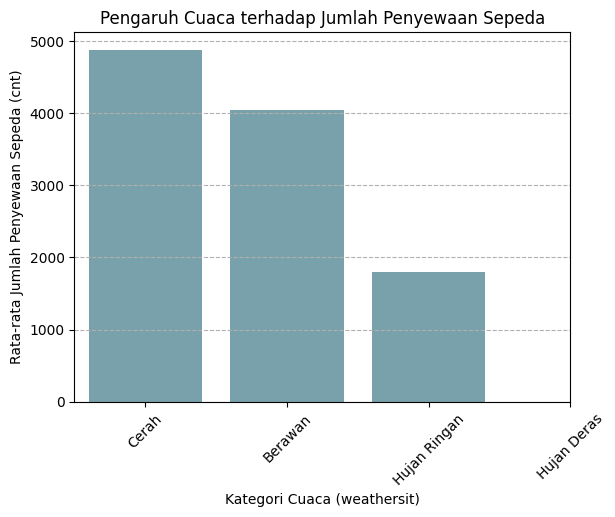

In [57]:
sns.barplot(x="weathersit", y="cnt", data=weather_rental_avg, color='#70a6b3')

plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Kategori Cuaca (weathersit)")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda (cnt)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan Ringan", "Hujan Deras"], rotation=45)
plt.grid(axis="y", linestyle="--")

plt.show()

**Insight:**

*   Rata-rata jumlah penyewaan sepeda tertinggi terjadi saat cuaca cerah yaitu sebanyak 4.876 sepeda/hari.
*   Saat kondisi cuaca berawan lebih tebal, rata-rata penyewaan turun menjadi 4.035 sepeda/hari.
*   Ketika cuaca semakin buruk, misalnya hujan ringan, penyewaan sepeda turun drastis menjadi 1.803 sepeda/hari.
*   Apabila terjadi hujan deras, tidak ada pelanggan yang menyewa sepeda.


### Apakah pengguna **registered** lebih sering menyewa sepeda di hari kerja dibandingkan pengguna **casual**?



In [45]:
workingday_rental_avg = day_df.groupby("workingday")[["registered", "casual"]].mean()
print(workingday_rental_avg)

             registered       casual
workingday                          
0           2959.034632  1371.134199
1           3978.250000   606.570000


<Figure size 640x480 with 0 Axes>

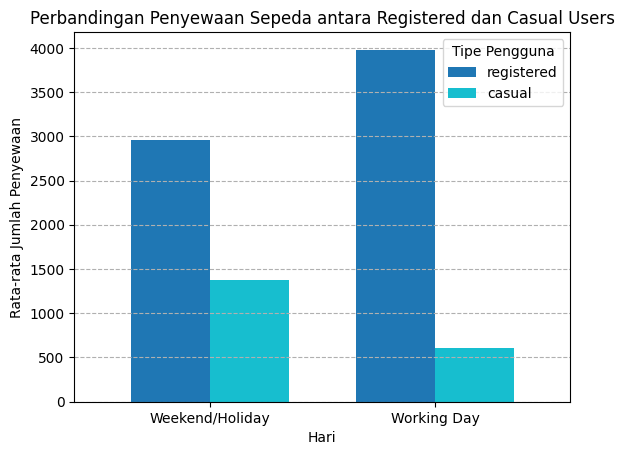

In [56]:
workingday_rental_avg.index = ["Weekend/Holiday", "Working Day"]

plt.figure()
workingday_rental_avg.plot(kind="bar", stacked=False, colormap="tab10", width=0.7)
plt.title("Perbandingan Penyewaan Sepeda antara Registered dan Casual Users")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(rotation=0)
plt.legend(title="Tipe Pengguna")
plt.grid(axis="y", linestyle="--")
plt.show()

**Insight:**
- Pengguna registered lebih dominan di hari kerja
- Pengguna casual lebih dominan di akhir pekan

## Analisis Lanjutan Menggunakan Metode Clustering-Binning

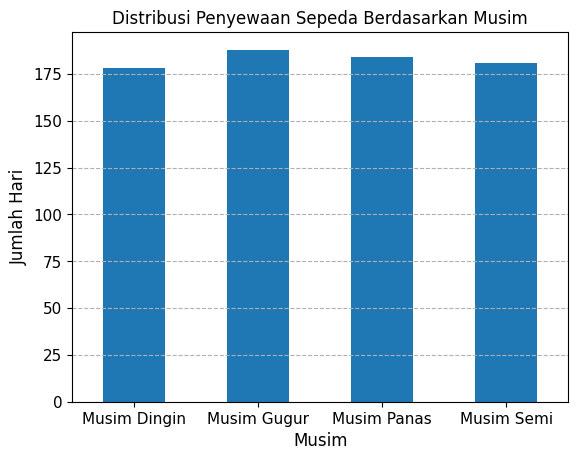

In [78]:
season_labels = ["Musim Semi", "Musim Panas", "Musim Gugur", "Musim Dingin"]

day_df["season_category"] = day_df["season"].map(dict(zip(range(1, 5), season_labels)))

season_distribution = day_df["season_category"].value_counts().sort_index()

plt.figure()
bars = season_distribution.plot(kind="bar", colormap = "tab10")

plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Hari", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--')

plt.show()

**Insight:**

*   Dari bar chart terlihat bahwa jumlah hari dengan penyewaan sepeda cukup merata di setiap musim. Artinya, musim tidak terlalu berpengaruh besar terhadap kebiasaan pengguna dalam menyewa sepeda.
*   Karena penyewaan stabil sepanjang tahun, strategi promosi bisa lebih fleksibel dan tidak hanya berfokus pada satu musim tertentu.


## Conclusion

- **Conclution pertanyaan 1**: Cuaca memiliki pengaruh yang cukup besar terhadap jumlah penyewaan sepeda. Saat cuaca cerah, lebih banyak orang menyewa sepeda, sedangkan saat cuaca buruk, jumlah penyewaan menurun secara signifikan.
- **Conclution pertanyaan 2:** Pengguna registered lebih banyak menyewa sepeda di hari kerja, kemungkinan karena mereka menggunakan sepeda sebagai transportasi rutin ke kantor atau sekolah, sedangkan pengguna casual lebih banyak menyewa di akhir pekan atau hari libur, mungkin untuk rekreasi atau aktivitas santai.